In [1]:
train = pd.read_csv('train.csv')

In [2]:
train.shape

(1460, 81)

In [3]:
train.isnull().values.any()

True

In [4]:
missing_features = train.columns[train.isnull().sum() > 0]

In [5]:
def create_bool_feature(df,col,val,val0,val1):
    vals = list()
    for i, row in df.iterrows():
        if ((type(row[col]) is float) | (type(row[col]) is int)):
            if np.isnan(row[col]):
                vals.append(row[col])
            elif row[col] == val:
                vals.append(str(val0))
            else:
                vals.append(str(val1))
        else:
            if pd.isnull(row[col]):
                vals.append(row[col])
            elif row[col] == val:
                vals.append(str(val0))
            else:
                vals.append(str(val1))
    df[col+'_bool'] = vals
    return df

def convert_object(df,col):
    vals = list()
    for i, row in df.iterrows():
        if ((type(row[col]) is float) | (type(row[col]) is int)):
            if np.isnan(row[col]):
                vals.append(row[col])
            else:
                vals.append(str(row[col]))
        else:
            if pd.isnull(row[col]):
                vals.append(row[col])
            else:
                vals.append(str(row[col]))
    df[col] = vals
    return df

In [6]:
create_bool_feature_real = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','OpenPorchSF','WoodDeckSF','GarageArea','KitchenAbvGr',
                'EnclosedPorch','LowQualFinSF','2ndFlrSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea']
for col in create_bool_feature_real:
    train = create_bool_feature(train,col,0,0,1)

##create_bool_feature_obj 
train = create_bool_feature(train,'Fence','MnPrv','MnPrv','rest')
train = create_bool_feature(train,'GarageCond','TA','TA','rest')
train = create_bool_feature(train,'GarageQual','TA','TA','rest')
train = create_bool_feature(train,'GarageType','Attchd','Attchd','rest')
train = create_bool_feature(train,'Electrical','SBrkr','SBrkr','rest')
train = create_bool_feature(train,'BsmtFinType2','Unf','Unf','rest')
train = create_bool_feature(train,'BsmtExposure','No','No','rest')
train = create_bool_feature(train,'BsmtCond','TA','TA','rest')
train = create_bool_feature(train,'MasVnrType','None','None','rest')

In [7]:
convert_object_real = ['GarageCars','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath',
                 'OverallCond','OverallQual','MSSubClass','YrSold','MoSold','YearRemodAdd','YearBuilt']
for col in convert_object_real:
    train = convert_object(train,col)

In [8]:
train = create_bool_feature(train,'BsmtHalfBath',0,0,1)

In [9]:
bool_feats = [col.split('_')[0] for col in train.select_dtypes('object').columns if 'bool' in col]

In [10]:
cat_only_feats = [col for col in train.select_dtypes('object').columns if col not in bool_feats]

In [11]:
real_only_feats = [col for col in list(train.select_dtypes('int').columns) + list(train.select_dtypes('float').columns) if col not in bool_feats]

In [12]:
real_bool_feats = [col for col in list(train.select_dtypes('int').columns) + list(train.select_dtypes('float').columns) if col in bool_feats]

In [13]:
real_cat_feats = [col for col in train.select_dtypes('object').columns if col in bool_feats]

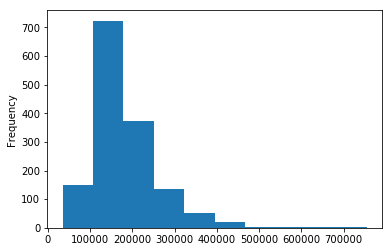

In [14]:
train.SalePrice.plot(kind='hist')

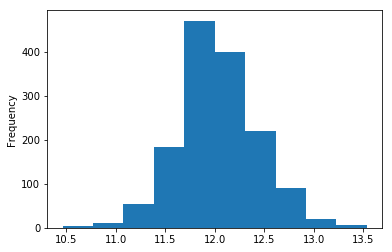

In [15]:
np.log(train.SalePrice).plot(kind='hist')

In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence_bool,GarageCond_bool,GarageQual_bool,GarageType_bool,Electrical_bool,BsmtFinType2_bool,BsmtExposure_bool,BsmtCond_bool,MasVnrType_bool,BsmtHalfBath_bool
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,0,0,0,0,0,0,1,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,0,0,0,0,1,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,0,0,0,0,1,0,1,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,0,1,0,0,0,1,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,0,0,0,0,1,0,1,1


In [23]:
for col in bool_feats:
    print col
    print train[col].value_counts()
    print train[col+'_bool'].value_counts()
    print "--------"

MiscVal
0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64
0    1408
1      52
Name: MiscVal_bool, dtype: int64
--------
PoolArea
0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64
0    1453
1       7
Name: PoolArea_bool, dtype: int64
--------
ScreenPorch
0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
       ... 
163       1
165       1
291

In [21]:
train.Fence_bool.value_counts()

0    157
1    124
Name: Fence_bool, dtype: int64